# Single-variate Linear Regression without Bias Term

## Programming Lab.: 06_02. SVLR without Bias Term for One Sample

이번 실습에서는 041_02 실습에서 만든 dataset generator를 통해 dataset을 만들고,  
이전 실습에서 만든 basic building node들을 이용하여 bias term이 없는 single-variate linear model을 학습시킵니다.

이번 실습에서는 다음의 단계들을 통해 SVLR without bias term model의 학습원리를 확인합니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 Model/Loss Implementation </li>
    <li> Step.3 Learning </li>
    <li> Step.4 Predictor Visualization </li>
</ul>

먼저 다음의 셀을 실행시켜 필요한 library들과 basic nodes, dataset generator를 import하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from sklearn.datasets import make_regression
    
plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Preparation

SVLR without bias term을 위한 dataset은
$$y = ax$$
의 식에서부터 만들어집니다.

그리고 LR_dataset_generator는 coefficient를 지정해주지 않으면 weight는 1, bias는 0으로 설정해주기 때문에  
feature_dim만 1로 설정해주면
$$y = x$$
에서부터 dataset을 만듭니다.

***
**Programming**  
$$y = x$$
make_regression() 함수를 이용하여 dataset을 만드세요.  
샘플 수는 100개, 노이즈는 0.0으로 설정합니다.

Text(0, 0.5, 'Y Data')

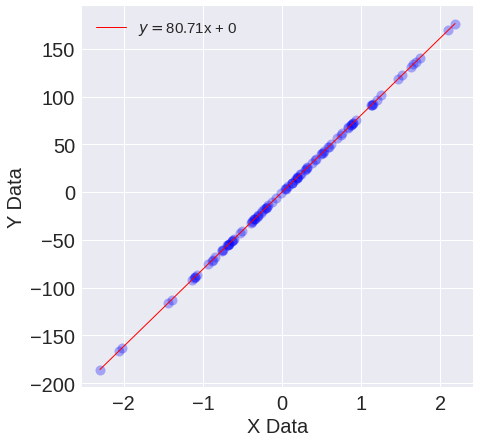

In [2]:
np.random.seed(0)

##### Start Your Code(Dataset Preparation) #####
n_samples = 100
n_features = 1
bias = 0
noise = 0.0
##### End Your Code(Dataset Preparation) #####
X, Y, w = make_regression(
    n_samples=n_samples, n_features=n_features, bias=bias,
    noise=noise, coef=True, random_state=1)

# cancatenate X and Y
Y_Val = [list(x) for x in zip(Y)]
dataset = np.hstack((X, Y_Val))

# plot graph
fig, ax = plt.subplots(figsize = (7,7))

ax.plot(dataset[:,0], dataset[:,1], 'bo', alpha=0.3, markersize=10)
ax.plot([min(dataset[:,0]), max(dataset[:,0])],
        [min(dataset[:,1]), max(dataset[:,1])],
           linewidth=1, color='r',
           label = r'$y = $' + str(np.round(w, 2)) +
           'x + ' + str(np.round(bias, 3)))
ax.legend(loc = 'upper left', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel("X Data", fontsize = 20)
ax.set_ylabel("Y Data", fontsize = 20)

**Expected Output**  
<img src='./imgs/06_02_01.png'>

***
## Step.2 Model/Loss Implementation

Step.2에서는 학습에 필요한 model과 loss function을 basic building node들을 이용하여 구현합니다.  
강의에서 사용된 model과 loss는 다음과 같습니다.  
<img src='./imgs/06_02_02.png' width = 600>

따라서 model을 implementation하기 위해선 mul_node가 필요하고,  
loss를 implementation하기 위해선 minus_node와 square_node가 필요합니다.

***
**Programming**  
SVLR without bias term model과 square error loss를 구현하는데 필요한 basic building node를 instantiation하세요.  

In [4]:
##### Start Your Code(Model Implementation) #####
node1 = nodes.mul_node()
##### End Your Code(Model Implementation) #####


##### Start Your Code(Loss Implementation) #####
node2 = nodes.minus_node()
node3 = nodes.square_node()
##### End Your Code(Loss Implementation) #####

***
## Step.3 Learning

Step.3에서는 Step.1에서 만든 dataset과 Step.2에서 만든 node들을 이용하여 학습을 진행합니다.  
deep learning에서의 학습은 model이 가지고 있는 learnable parameter인 $w$를 대상으로 하고,  
1. forward propagation에서 loss를 계산한 뒤,  
2. chain rule을 이용한 backpropagation을 통해 loss에 대한 $w$의 partial derivative를 구합니다.  
3. 그리고 gradient descent method를 이용해 learnable parameter $w$를 iterative하게 학습시킵니다.

***
**Programming**  
SVLR without bias term model을 학습시키세요.

이를 위하여 먼저 학습에 필요한 parameter를 설정해줍니다. 설정해줄 parameter들은 다음과 같습니다.
- initial w = 0.1
- learning rate = 0.01
- total epoch = 1

그리고 실제 model을 학습시켜봅니다.

Text(0.5, 1.0, '$\\mathcal{L}$')

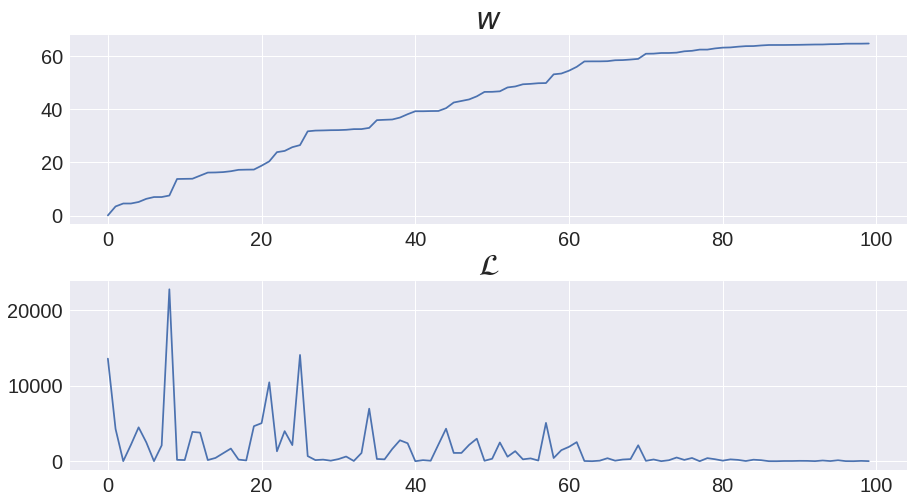

In [6]:
##### Start Your Code(Learning Preparation) #####
w = 0.1
lr = 0.01
epochs = 1
##### End Your Code(Learning Preparation) #####

w_list = []
loss_list = []

for epoch in range(epochs):
    for x, y in dataset:
        ##### Start Your Code(Forward Propagation) #####
        z1 = node1.forward(w, x)
        z2 = node2.forward(y, z1)
        l = node3.forward(z2)
        ##### End Your Code(Forward Propagation) #####
        
        
        ##### Start Your Code(Backpropagation) #####
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dw, dx = node1.backward(dz1)
        ##### End Your Code(Backpropagation) #####
        
        w_list.append(w)
        loss_list.append(l)
        
        ##### Start Your Code(Gradient Descent Method) #####
        w = w - lr*dw
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(w_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

**Expected Output**  
<img src='./imgs/06_02_03.png'>

***
## Step.4 Predictor Visualization

다음의 셀을 실행시켜 initial model이 target function에 가까워지도록 학습이 일어나는지 확인하세요.  
그리고 $w, \mathcal{L}$의 변화와 predictor의 변화를 비교하며 학습의 원리를 분석해보세요.  

**Further Works**   
- predictor를 완벽히 학습시키기 위해서는 Step.3에서 어떤 변화를 줘야하는지 생각해보고, 수정 후 Step.3, Step.4를 다시 실행시켜보세요.
- loss가 감소하면서 fluctuation이 심하게 일어나는 이유에 대하여 분석하세요.

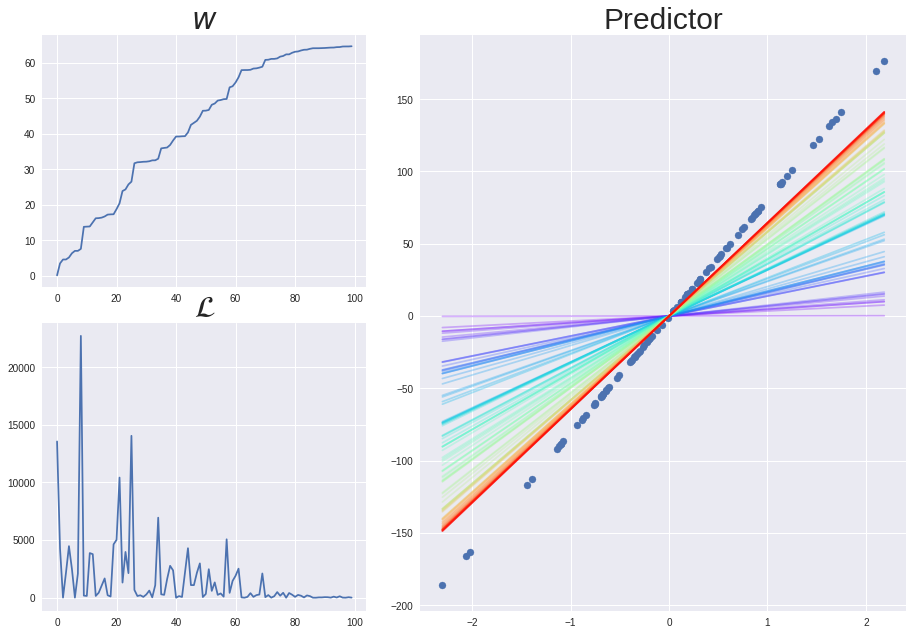

In [7]:
fig = plt.figure(figsize = (15,10))
left, bottom = 0.1, 0.1
width, height = 0.3, 0.4
spacing = 0.05

ax_w = fig.add_axes([left, bottom + height + spacing, width,
                        1-(2*bottom + height + spacing)])
ax_loss = fig.add_axes([left, bottom, width, height])
ax_pred = fig.add_axes([left + width + spacing, bottom,
                       1 - (2*left + width + spacing), 2*height])

ax_w.set_title(r'$w$', fontsize = 30)
ax_loss.set_title(r'$\mathcal{L}$', fontsize = 30)
ax_pred.set_title('Predictor', fontsize = 30)
ax_w.plot(w_list)
ax_loss.plot(loss_list)

ax_pred.scatter(X[:,0], Y)
cmap = cm.get_cmap('rainbow', lut = len(w_list))
x_range = np.array([np.min(X[:,0]), np.max(X[:,0])])
for w_idx, w in enumerate(w_list):
    pred = w*x_range
    
    ax_pred.plot(x_range, pred, color = cmap(w_idx),
                alpha = 0.3)
    

**Expected Output**  
<img src='./imgs/06_02_04.png'>

***
**Programming**  
Step.3에서 작성한 training code를 추후 여러번 이용하기 때문에 함수화 해줍니다.

다음 정의되는 trainer 함수의 input/output은 다음과 같습니다.
- INPUT : dataset, initial theta, learning rate, total epochs
- OUTPUT : $w, \mathcal{L}$와 predictor의 시각화

이를 위해 Step.3에서 작성한 코드를 이용해 다음 함수를 채우세요.

In [8]:
def trainer(dataset, w, lr, epochs):
    ##### Start Your Code(trainer Functionalization) #####
    w_list = []
    loss_list = []
    
    for epoch in range(epochs):
        for x, y in dataset:
            z1 = node1.forward(w, x)
            z2 = node2.forward(y, z1)
            l = node3.forward(z2)

            dz2 = node3.backward(1)
            dy, dz1 = node2.backward(dz2)
            dw, dx = node1.backward(dz1)
        
            w_list.append(w)
            loss_list.append(l)
        
            w = w - lr*dw
    ##### End Your Code(trainer Functionalization) #####
    
    fig = plt.figure(figsize = (15,10))
    left, bottom = 0.1, 0.1
    width, height = 0.3, 0.4
    spacing = 0.05

    ax_range = [min(dataset[:,0]), max(dataset[:,0]),
                min(dataset[:,1]), max(dataset[:,1])]
    ax_w = fig.add_axes([left, bottom + height + spacing, width,
                            1-(2*bottom + height + spacing)])
    ax_loss = fig.add_axes([left, bottom, width, height])
    ax_pred = fig.add_axes([left + width + spacing, bottom,
                           1 - (2*left + width + spacing), 2*height])

    ax_w.set_title(r'$w$', fontsize = 30)
    ax_loss.set_title(r'$\mathcal{L}$', fontsize = 30)
    ax_pred.set_title('Predictor', fontsize = 30)
    ax_w.plot(w_list)
    ax_loss.plot(loss_list)

    ax_pred.plot(dataset[:,0], dataset[:,1], 'bo', alpha=0.3, markersize=10)
    cmap = cm.get_cmap('rainbow', lut = len(w_list))
    x_range = np.array([np.min(dataset[:,0]), np.max(dataset[:,0])])
    for w_idx, w in enumerate(w_list):
        pred = w*x_range

        ax_pred.plot(x_range, pred, color = cmap(w_idx),
                    alpha = 0.3)
        
    return w_list, loss_list

***
**Programming**  

위의 trainer 함수를 이용하여 다음의 조건에서의 학습을 진행하세요.  
- initial theta = 0.1
- learning rate = 0.008
- epochs = 1

([0.1,
  2.7897662660349307,
  3.680397454653121,
  3.682593738002139,
  4.143831916686828,
  5.103641140164903,
  5.647754088020992,
  5.650036819891228,
  6.111690069755934,
  11.177463525383384,
  11.222302670018145,
  11.26041879028872,
  12.223776234662983,
  13.183318720079544,
  13.22307968579969,
  13.335327876947547,
  13.60966435725987,
  14.047673545979883,
  14.1041434692418,
  14.13143808394908,
  15.357837190167338,
  16.728039693544382,
  19.66038497655674,
  20.056735591934967,
  21.268241469078077,
  21.93769768483563,
  26.429577377734773,
  26.67386499840538,
  26.727629813291657,
  26.80437995512714,
  26.830023309942337,
  26.931952579438317,
  27.158336254216373,
  27.170471656876643,
  27.570937325128202,
  30.159360502934653,
  30.278659416320394,
  30.378780742798536,
  31.033387951160506,
  32.17588573990341,
  33.189559005116635,
  33.18968095687714,
  33.25169384192612,
  33.27937085886496,
  34.2475232465852,
  36.209003508476314,
  36.74226009497522,
  37.

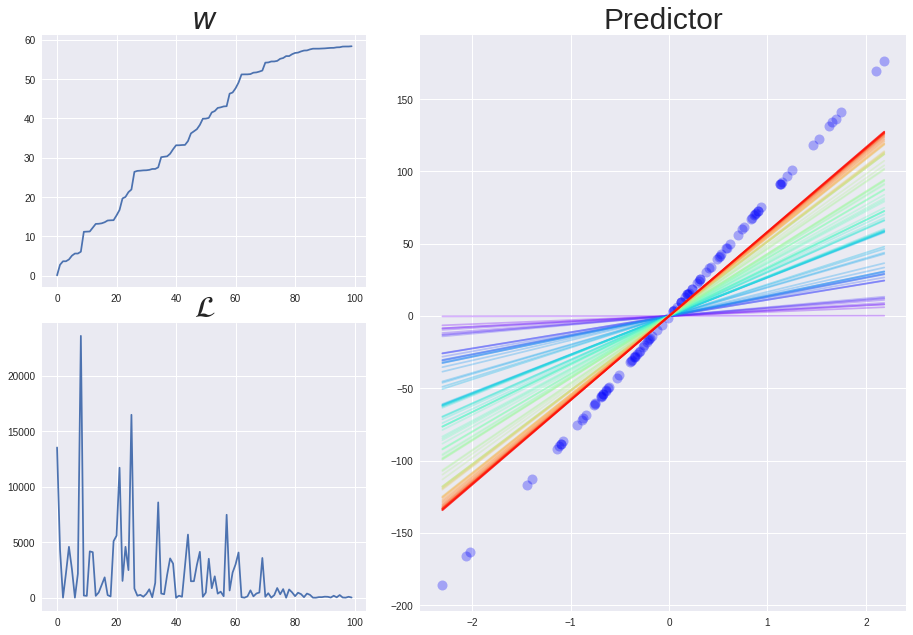

In [9]:
##### Start Your Code(Learning Preparation) #####
w = 0.1
lr = 0.008
epochs = 1
##### End Your Code(Learning Preparation) #####


##### Start Your Code(trainer Function) #####
trainer(dataset, w, lr, epochs)
##### End Your Code(trainer Function) #####

**Expected Output**  
<img src='./imgs/06_02_05.png'>